<div dir="rtl">
    <h1>
        وارد کردن کتابخانه ها
    </h1>
</div>

In [439]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import time
from sympy.utilities.iterables import multiset_permutations
import scipy

<div dir="rtl">
    <h1>
        تعریف ثابت ها
    </h1>
</div>

In [348]:
number_of_total_ways = 100

sp = 1.3

P = [(1/n)*(sp-2*(sp-1)*((i-1)/(n-1))) for i in range(1, n+1)]

print(f"sum of all P is: {np.array(P).sum()}")

mutation_probability = 0.08

sum of all P is: 1.0


<div dir="rtl">
    <h1>
        توابع کمکی
    </h1>
</div>

<div dir="rtl">
    <h3>
        تابع فاصله ی بین دو شهر
    </h3>
</div>

In [3]:
def distance(A: np.ndarray, B: np.ndarray) -> float:
    '''
    Explain:
        get two city position and calculate distance of them.
    Parameters:
        A: np.array([x_A, y_A])
        B: np.array([x_B, y_B])        
    Return:
        A, B are mathematical vectors so distance of two city: |B-A|
    '''
    
    return np.sqrt(((B-A)**2).sum())

<div dir="rtl">
    <h3>
            تابع مجموع فاصله های بین شهر ها در یک مسیر مشخص
    </h3>
</div>

In [335]:
def total_distance_in_a_way(way: np.array) -> float:
    '''
        Explain:
            get a way with size n that is a numpy array of city positions and calculate
            total distance to go throuth all the ways.
        Return:
            total distance (float)
    '''
    total_d = 0
    for i in range(len(way)-1):
        total_d += distance(way[i], way[i+1])
        
    return total_d    

<div dir="rtl">
    <h3>
            تابع مرتب (سورت) کردن راه ها بر حسب مجموع طول راه در هر یک
    </h3>
</div>

In [384]:
def sort_all_ways(all_ways: np.ndarray) -> np.ndarray:
    '''sort all ways proportional to each way's total distance'''
    
#     # each distance is for each way
#     all_distances = np.zeros(number_of_total_ways)
    
#     for i in range(number_of_total_ways):
#         all_distances[i] = total_distance_in_a_way(all_ways[i])
        
    all_distances = np.array(list(map(total_distance_in_a_way, all_ways)))
    
    # sort indexes of all distances
    sorted_indexes = np.argsort(all_distances)
    
    return np.array([all_ways[i] for i in sorted_indexes])

<div dir="rtl">
    <h3>
            انتخاب تصادفی دو راه از بین کل راه ها با تابع توزیع احتمال مشخص شده
    </h3>
</div>

In [337]:
def choose_two_ways(all_ways: np.ndarray) -> tuple:
    '''choose two ways of all ways with probability of P defiend first'''
    
    # choose two random labels
    a, b = np.random.choice(np.arange(number_of_total_ways), size=2, p=P)
    
    return all_ways[a], all_ways[b]

<div dir="rtl">
    <h3>
            تابع انجام جهش در یک راه
    </h3>
</div>

In [412]:
def mutation(way: np.array, p: float) -> np.array:   
    '''change two city in the sequence with each other with probability of p and return the mutated way'''
    
    if np.random.random() < p:
        # choose two random indexes a, b
        a, b = np.random.randint(len(way), size=2)
        
        # change position of those two
        # use way[a].copy() because way[a] returns the address of the object (way[a])
        city_a = way[a].copy()
        way[a] = way[b]
        way[b] = city_a
            
    return way

<div dir="rtl">
    <h3>
            تابع ساخت فرزند از روی والد
    </h3>
</div>

In [274]:
def create_childs(way: np.array) -> np.array:
    w = np.zeros([len(way), 2])

    for i in range(len(way)):
        w[i] = way[len(way)//2-i]
    
    return w

<div dir="rtl">
    <h3>
            تابع رسم نتایج
    </h3>
</div>

In [378]:
def draw(shortest_ways, steps_done_time):
    '''to draw results'''
    
    # shortest path Vs iteration step
    plt.plot(np.arange(len(shortest_ways)), shortest_ways)
    
    plt.xlabel("iteration")
    plt.ylabel("shortest path")
    plt.annotate('fig 1: shortest path Vs iteration step', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

    plt.figure()
    
    # each step done at time Vs shortest path founded
    plt.plot(shortest_ways, steps_done_time)
    
    plt.xlabel("shortest path founded")
    plt.ylabel("each step done at time (seconds)")
    plt.annotate('fig 2: each step done at time Vs shortest path founded', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')

<div dir="rtl">
    <h1>
                   حلقه ی اصلی
    (حل با الگوریتم ژنتیکی)
    </h1>
</div>

In [444]:
def main(n: int, max_iterations: int=None, exact_answer: float=None) -> list:
    '''
    Explain:
        do the main algorithem
    Return"
        shortest ways total distances
    '''
    
    # start time
    start_time = time.time()
    
    # each step on the the time below
    steps_done_time = []
    
    # initiate a numpy array for all ways
    all_ways = [None]*number_of_total_ways
    
    # initiate a way
    way = np.array([[i, j] for i in range(int(np.sqrt(n))) for j in range(int(np.sqrt(n)))])

    for i in range(number_of_total_ways):
        # shuffle the ways
        np.random.shuffle(way)

        # add way to all ways
        all_ways[i] = way
    
    # initiate a list to save shortest ways total distances
    shortest_ways = []

    i = 0
    while True :
        # sort all ways
        all_ways = sort_all_ways(all_ways)

        # save shortest way
        shortest_ways.append(total_distance_in_a_way(all_ways[0]))
    
        new_all_ways = [None]*number_of_total_ways

        # first two ways remain
        new_all_ways[0] = all_ways[0]
        new_all_ways[1] = all_ways[1]    

        for j in range(2, number_of_total_ways, 2):
            # choose two ways randomly
            way_1, way_2 = choose_two_ways(all_ways)
            
            # create childs
            way_1 = create_childs(way_1)
            way_2 = create_childs(way_2)
            
            # do mutation
            way_1 = mutation(way_1.copy(), p=mutation_probability)
            way_2 = mutation(way_2.copy(), p=mutation_probability)

            # assign new ways
            new_all_ways[j] = way_1
            new_all_ways[j+1] = way_2

        all_ways = new_all_ways
        steps_done_time.append(time.time() - start_time)
         
        # if find a way shrter than 1.01 exact answer, break the loop
        if exact_answer and (shortest_ways[-1] <= exact_answer + exact_answer/100):
            break
        elif max_iterations:
            i += 1
            if i >= max_iterations:
                break
                
    # draw the results
    draw(shortest_ways, steps_done_time)
    
    # print shortest path
    print(f"shortest path has length: {shortest_ways[-1]}")

shortest path has length: 433.16394619052915


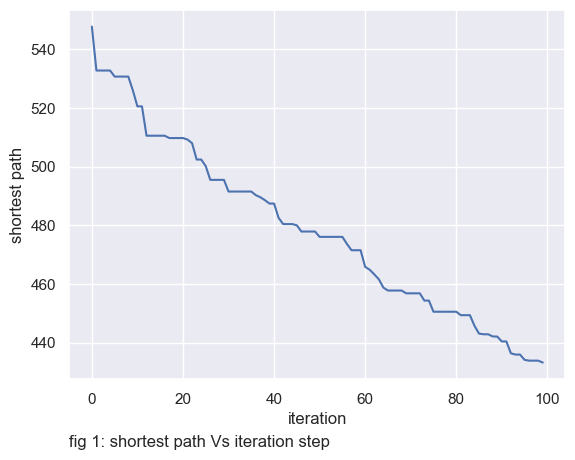

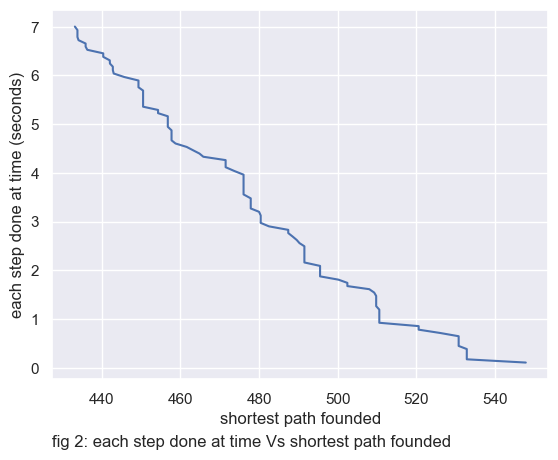

In [419]:
main(n=100, max_iterations=100)

<div dir="rtl">
    <h1>
                   حلقه ی اصلی
    (حل دقیق)
    </h1>
</div>

In [421]:
def exact_main(n: int):
    start_time = time.time()
    
    # initiate a way that includes all cities
    way = [[i, j] for i in range(int(np.sqrt(n))) for j in range(int(np.sqrt(n)))]
    
    # get all permutation of cities
    all_ways = list((multiset_permutations(way)))
    
    # find all distaces array
    shortest_path = min(map(lambda way: total_distance_in_a_way(np.array(way)), all_ways))
    
    print(f"calculated in {time.time()-start_time} seconds.")
    
    return shortest_path

In [422]:
exact_main(9)

calculated in 21.616816997528076 seconds.


8.0

<div dir="rtl">
    <h3>
    حل با شرایط مشابه ولی با الگوریتم ژنتیکی برای مقایسه با حل دقیق
    </h3>
</div>

shortest path has length: 8.0


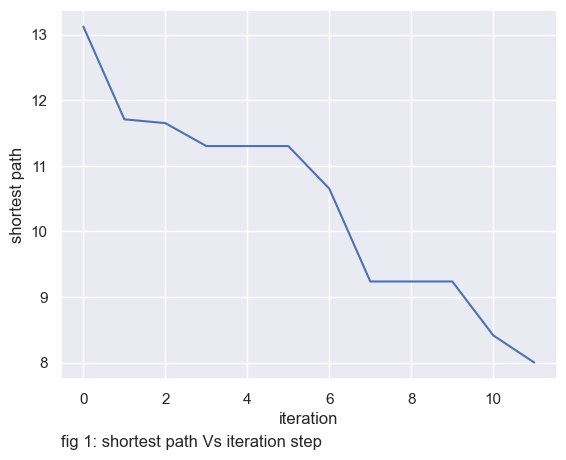

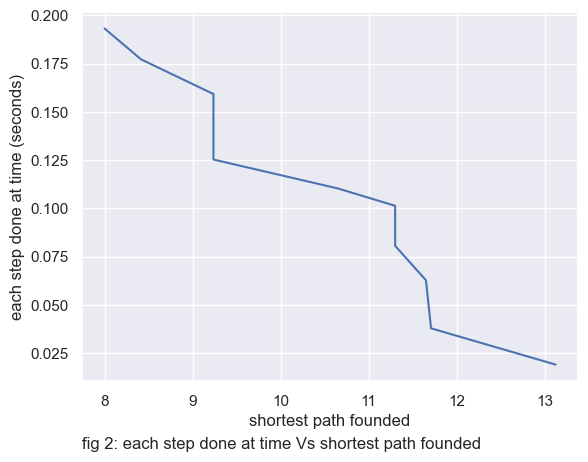

In [445]:
main(n=9, exact_answer=8)